In [10]:
#import libraries
import pandas as pd # for creating data fames
import numpy as np # for numerical analysis
import matplotlib.pyplot as plt # for graphical representation of the data
from sklearn import linear_model # required model import from sklearn library
from sklearn.datasets import load_boston
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset from sklearn datasets repository
boston_dataset = load_boston()

In [3]:
# We print the value of the boston_dataset to understand what it contains.
print(boston_dataset.keys())

# data: contains the information for various houses
# target: prices of the house
# feature_names: names of the features
# DESCR: describes the dataset

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# To know more about the features use boston_dataset.DESCR The description of all the features is given below.
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Put the data into pandas DataFrames
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston

# The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables,
# based on which we will predict the value of a house.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
# We can see that the target value MEDV is missing from the data.
# We create a new column of target values and add it to the dataframe.
boston['MEDV'] = boston_dataset.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

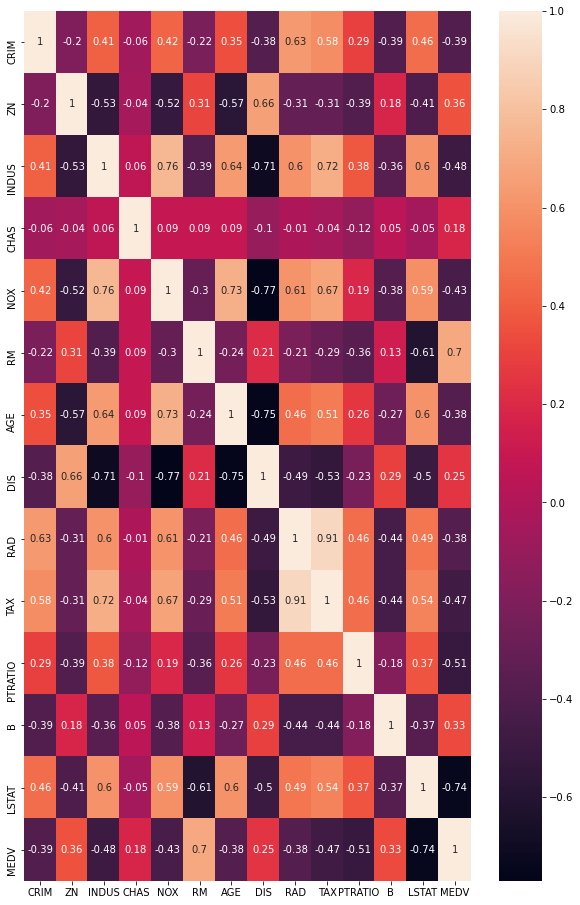

In [14]:
# we create a correlation matrix that measures the linear relationships between the variables.
# The correlation matrix can be formed by using the corr function from the pandas dataframe library.
# We will use the heatmap function from the seaborn library to plot the correlation matrix.

correlation_matrix = boston.corr().round(2)

plt.figure(figsize=(10, 16)) #increase the heatmap display size

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [31]:
# create multiple linear regression model

reg = linear_model.LinearRegression()
reg.fit(boston[['RM','LSTAT']],boston.MEDV)

# i choose RM becuase the coorelation with MEDV (target cariable) is 0.7 (Positive, Strong Correlation)
# LSTAT becuase the coorelation with MEDV (target cariable) is -0.74 (Negative, Strong Correlation).

LinearRegression()

In [32]:
coef = reg.coef_
coef

array([ 5.09478798, -0.64235833])

In [33]:
y_inter = reg.intercept_
y_inter

-1.358272811874489

In [36]:
# multilinear regression equation is as follows:
# y = b1 * x1 + b2 * x2 + c
x1= 5
x2= 8
b1= 5.09478794
b2= -0.64235833
c= y_inter

y = b1 * x1 + b2 * x2 + c
y

18.97680024812551